In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import re

In [2]:
#loading the data
filepath = os.path.join(os.getcwd(),[i for i in os.listdir() if len(re.findall(r'.*csv',i)) != 0][0])
filepath

'c:\\Users\\ASUS\\Desktop\\Hands on ML\\Pipeline Accidents\\database.csv'

In [3]:
df_raw = pd.read_csv(filepath)
df_raw.head(10)

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650
5,20100021,17161,2010,1/8/2010 11:38 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",NaN,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,76940.0,167775.0,150000.0,1800000.0,2000000.0,0.0,4194715
6,20110036,18052,2010,1/9/2010 12:15 AM,26041,"KINDER MORGAN LIQUID TERMINALS, LLC",NaN,ONSHORE,TANK,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",...,NaN,NaN,NaN,0.0,400.0,0.0,0.0,70000.0,0.0,70400
7,20100255,18584,2010,1/9/2010 1:12 AM,12624,MOBIL CORP,HULL STATION,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,400.0,13.0,0.0,0.0,0.0,0.0,413
8,20100261,18050,2010,1/10/2010 7:46 PM,26041,"KINDER MORGAN LIQUID TERMINALS, LLC",NaN,ONSHORE,ABOVEGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",...,NaN,NaN,NaN,0.0,336.0,0.0,0.0,40000.0,0.0,40336
9,20100024,18390,2010,1/11/2010 2:30 PM,31684,CONOCOPHILLIPS,TANK 1501,ONSHORE,TANK,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",...,NaN,NaN,NaN,0.0,50.0,0.0,10000.0,10000.0,10000.0,30050


Finding how much of missing values each column contains, so that we can drop/fill the relevant missing values. 

In [4]:
def count_missing_values(df):
    missing_value_count = list()
    missing_value_percentage = list()
    column_list = df.columns.tolist()
    total_length = df.shape[0]
    for column in column_list:
        missing_value_count.append(sum(df[column].isna()))
        missing_value_percentage.append((missing_value_count[-1]/total_length)*100)
    #make a dataframe to visualize the missing values
    df_missing_values = pd.DataFrame({'Feature':column_list,'Missing Value Count':missing_value_count,'Missing Value %':missing_value_percentage})
    return df_missing_values

In [5]:
df_missing_values = count_missing_values(df_raw)
display(df_missing_values.style.background_gradient(cmap = 'Reds',axis = 0))

,Feature,Missing Value Count,Missing Value %
0,Report Number,0,0.000000
1,Supplemental Number,0,0.000000
2,Accident Year,0,0.000000
3,Accident Date/Time,0,0.000000
4,Operator ID,0,0.000000
5,Operator Name,0,0.000000
6,Pipeline/Facility Name,121,4.329159
7,Pipeline Location,0,0.000000
8,Pipeline Type,18,0.644007
9,Liquid Type,0,0.000000


As seen above the features relevant to Injuries and Fatalities do not have enough information to be used as useful features, hence these features will be dropped off.

In [6]:
def drop_injuries_fatalities(df):
    column_list = df.columns.tolist()
    result = [df.drop(column, axis = 1, inplace = True) for column in column_list if len(re.findall(r'.*Injuries',column)) != 0 or len(re.findall(r'.*Fatalities',column)) != 0]
    return df

In [7]:
df_raw = drop_injuries_fatalities(df_raw)

In [8]:
df_missing_values = count_missing_values(df_raw)
display(df_missing_values.style.background_gradient(cmap = 'Reds',axis = 0))

,Feature,Missing Value Count,Missing Value %
0,Report Number,0,0.000000
1,Supplemental Number,0,0.000000
2,Accident Year,0,0.000000
3,Accident Date/Time,0,0.000000
4,Operator ID,0,0.000000
5,Operator Name,0,0.000000
6,Pipeline/Facility Name,121,4.329159
7,Pipeline Location,0,0.000000
8,Pipeline Type,18,0.644007
9,Liquid Type,0,0.000000


The following Features have no impact on the Total cost of a pipeline burst, hence these features will be removed:
- Report Number
- Supplemental Number
- Accident Year
- Operator ID
- Pipeline/Facility Name

In [9]:
df_raw.drop(['Report Number','Supplemental Number','Accident Year','Operator ID','Pipeline/Facility Name'], axis = 1, inplace = True)
df_raw.head()

,Accident Date/Time,Operator Name,Pipeline Location,Pipeline Type,Liquid Type,Liquid Subtype,Liquid Name,Accident City,Accident County,Accident State,...,Shutdown Date/Time,Restart Date/Time,Public Evacuations,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,1/1/2010 7:15 AM,ONEOK NGL PIPELINE LP,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL G...,NaN,MCPHERSON,MCPHERSON,KS,...,NaN,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,1/4/2010 8:30 AM,PORTLAND PIPELINE CORP,ONSHORE,ABOVEGROUND,CRUDE OIL,NaN,NaN,RAYMOND,CUMBERLAND,ME,...,NaN,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,1/5/2010 10:30 AM,"PETROLOGISTICS OLEFINS, LLC",ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",OTHER HVL,ETHANE,SULPHER,CALCASIEU,LA,...,NaN,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
3,1/6/2010 7:30 PM,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",ONSHORE,UNDERGROUND,CRUDE OIL,NaN,NaN,SUPERIOR,DOUGLAS,WI,...,NaN,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540
4,1/7/2010 1:00 PM,"PLAINS PIPELINE, L.P.",ONSHORE,UNDERGROUND,CRUDE OIL,NaN,NaN,SHERMAN,GRAYSON,TX,...,NaN,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650


In [10]:
df_missing_values = count_missing_values(df_raw)
display(df_missing_values.style.background_gradient(cmap = 'Reds',axis = 0))

,Feature,Missing Value Count,Missing Value %
0,Accident Date/Time,0,0.000000
1,Operator Name,0,0.000000
2,Pipeline Location,0,0.000000
3,Pipeline Type,18,0.644007
4,Liquid Type,0,0.000000
5,Liquid Subtype,1446,51.735242
6,Liquid Name,2573,92.057245
7,Accident City,315,11.270125
8,Accident County,75,2.683363
9,Accident State,12,0.429338


Now we shall fill in the missing values for liquid subtype

As the **Liquid Type** column is not missing any values, and **Liquid Subtype** is dependent on the Liquid Type, we shall combine these 2 features to observe if any relation can be observed to fill in **Liquid Subtype**)

In [11]:
from collections import Counter

In [12]:
liquid_type_subtype = ['_'.join([str(i[0]),str(i[1])]) for i in list(zip(df_raw["Liquid Type"],df_raw["Liquid Subtype"]))]

The above shows the unique **Liquid Type** and **Liquid Subtype** combinations

In [13]:
#liquid_type_subtype_counts = [Counter(liquid_type_subtype)[i] for i in Counter(liquid_type_subtype)]
liquid_type_subtype_counts = Counter(liquid_type_subtype)
liquid_type_subtype_counts

Counter({'HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS_LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL GAS LIQUID)': 188,
         'CRUDE OIL_nan': 1398,
         'HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS_OTHER HVL': 171,
         'REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID_GASOLINE (NON-ETHANOL)': 376,
         'REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID_DIESEL, FUEL OIL, KEROSENE, JET FUEL': 408,
         'HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS_ANHYDROUS AMMONIA': 55,
         'REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID_OTHER': 51,
         'CO2 (CARBON DIOXIDE)_nan': 38,
         'REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID_MIXTURE OF REFINED PRODUCTS (TRANSMIX OR OTHER MIXTURE)': 98,
         'REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID_nan': 6,
         'HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS_nan': 4,
         'BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL BLENDS)_BIODIESEL': 2})

In [14]:
liquid_type_subtype_unique = [i for i in liquid_type_subtype_counts]
liquid_type_subtype_counts = [liquid_type_subtype_counts[i] for i in liquid_type_subtype_counts]

<ipython-input-15-07b64b59e288>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_subtypes.set_xticklabels(liquid_type_subtype_unique,rotation = 90)


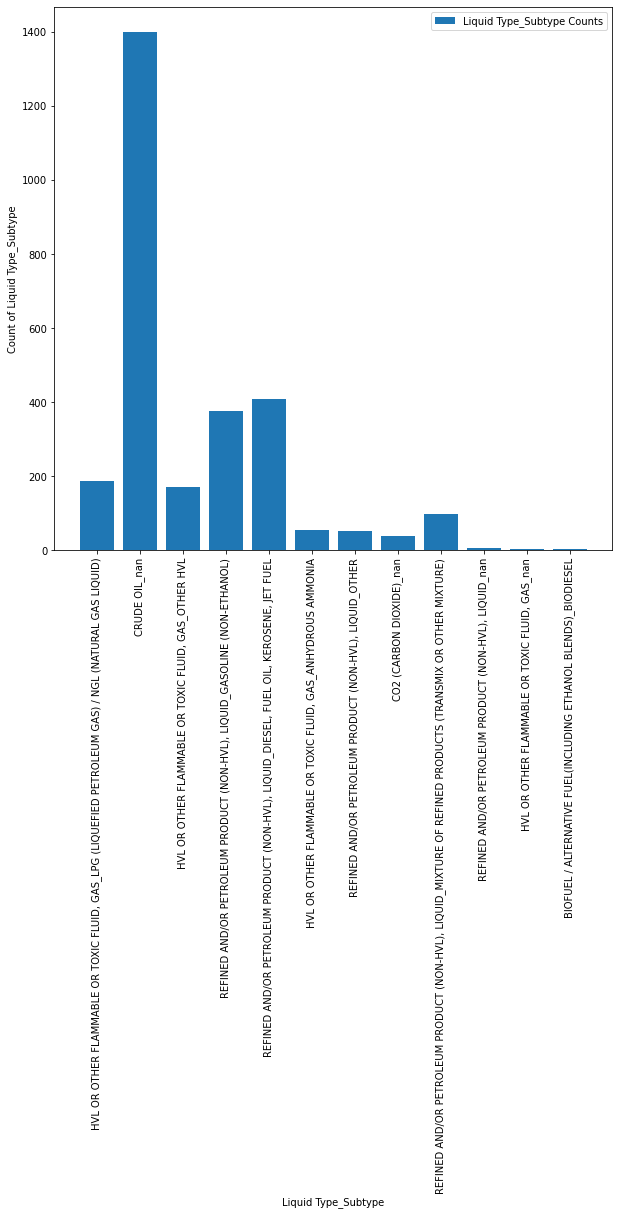

In [15]:
fig,ax_subtypes = plt.subplots(1,1,figsize = (10,10))
ax_subtypes.bar(liquid_type_subtype_unique,liquid_type_subtype_counts,label = "Liquid Type_Subtype Counts")
ax_subtypes.set_xticklabels(liquid_type_subtype_unique,rotation = 90)
ax_subtypes.set_xlabel("Liquid Type_Subtype")
ax_subtypes.set_ylabel("Count of Liquid Type_Subtype")
ax_subtypes.legend()
plt.show()

In [16]:
#Number of Crude Oil Liquid Type instances
df_raw.loc[df_raw["Liquid Type"] == "CRUDE OIL"].shape

(1398, 31)

In [17]:
df_raw.loc[df_raw["Liquid Type"] == "CO2 (CARBON DIOXIDE)"].shape

(38, 31)

In [18]:
df_raw.loc[df_raw["Liquid Type"] == "HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS"].shape

(418, 31)

In [19]:
df_raw.loc[df_raw["Liquid Type"] == "REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID"].shape

(939, 31)

There are 4 combinations which have NaN attached to them:

- CRUDE OIL_nan
- CO2 (CARBON DIOXIDE)_nan
- REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID_nan
- HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS_nan

From the above bar chart, we can see that "CRUDE OIL_nan" and "CO2 (CARBON DIOXIDE)_nan" has no liquid subtype attached to it as all instances of **Liquid Type** being CRUDE OIL (1398 instances) and CO2 (CARBON DIOXIDE)(38 instances) have no subtype attached to it. Hence we can simply put replace NaN with "None" for this category. 

For the other two categories, we replace the NaN with the most occuring subtype for that category.

In [20]:
#REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID_nan
refined_liquid_subtype = sorted([(i.split("_")[1],Counter(liquid_type_subtype)[i]) for i in Counter(liquid_type_subtype) if i.split("_")[0] == "REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID"], key = lambda x: x[1], reverse = True)[0][0]
refined_liquid_subtype

'DIESEL, FUEL OIL, KEROSENE, JET FUEL'

In [21]:
#HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS
HVL_liquid_subtype = sorted([(i.split("_")[1],Counter(liquid_type_subtype)[i]) for i in Counter(liquid_type_subtype) if i.split("_")[0] == "HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS"], key = lambda x: x[1], reverse = True)[0][0]
HVL_liquid_subtype

'LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL GAS LIQUID)'

In [22]:
#filling the missing liquid subtype

#CRUDE OIL and CO2 (CARBON DIOXIDE)
df_raw.loc[(df_raw["Liquid Type"] == "CRUDE OIL") | (df_raw["Liquid Type"] == "CO2 (CARBON DIOXIDE)"),"Liquid Subtype"] = "None"

df_raw.loc[(df_raw["Liquid Type"] == "REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID") & (df_raw["Liquid Subtype"].isna()),"Liquid Subtype"] = refined_liquid_subtype

df_raw.loc[(df_raw["Liquid Type"] == "HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS") & (df_raw["Liquid Subtype"].isna()),"Liquid Subtype"] = HVL_liquid_subtype

In [23]:
df_missing_values = count_missing_values(df_raw)
display(df_missing_values.style.background_gradient(cmap = 'Reds',axis = 0))

,Feature,Missing Value Count,Missing Value %
0,Accident Date/Time,0,0.000000
1,Operator Name,0,0.000000
2,Pipeline Location,0,0.000000
3,Pipeline Type,18,0.644007
4,Liquid Type,0,0.000000
5,Liquid Subtype,0,0.000000
6,Liquid Name,2573,92.057245
7,Accident City,315,11.270125
8,Accident County,75,2.683363
9,Accident State,12,0.429338


In [24]:
liquid_type_subtype = ['_'.join([str(i[0]),str(i[1])]) for i in list(zip(df_raw["Liquid Type"],df_raw["Liquid Subtype"]))]
liquid_type_subtype_counts = Counter(liquid_type_subtype)
liquid_type_subtype_counts

Counter({'HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS_LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL GAS LIQUID)': 192,
         'CRUDE OIL_None': 1398,
         'HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS_OTHER HVL': 171,
         'REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID_GASOLINE (NON-ETHANOL)': 376,
         'REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID_DIESEL, FUEL OIL, KEROSENE, JET FUEL': 414,
         'HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS_ANHYDROUS AMMONIA': 55,
         'REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID_OTHER': 51,
         'CO2 (CARBON DIOXIDE)_None': 38,
         'REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID_MIXTURE OF REFINED PRODUCTS (TRANSMIX OR OTHER MIXTURE)': 98,
         'BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL BLENDS)_BIODIESEL': 2})

Liquid Name has a lot of missing data, however we shall investigate if there is a recognizable pattern, by checking the combinations of Liquid Type, Liquid Subtype and Liquid Name, for the instances which contain Liquid Name

In [25]:
liquid_name = ['_'.join([str(i[0]),str(i[1])]) for i in list(zip(df_raw["Liquid Subtype"],df_raw["Liquid Name"])) if str(i[1]) != "nan"]
liquid_name_counts = Counter(liquid_name)
liquid_name_counts

Counter({'OTHER HVL_ETHANE': 24,
         'OTHER HVL_NORMAL BUTANE': 1,
         'OTHER HVL_PROPYLENE': 15,
         'OTHER_JET FUEL': 1,
         'OTHER HVL_RAW FEED': 1,
         'OTHER_VACUUM GAS OIL (VGO)': 1,
         'OTHER_NO 6 FUEL OIL': 1,
         'OTHER HVL_PROPANE': 26,
         'OTHER HVL_NATURAL GASOLINE': 5,
         'OTHER HVL_ISO BUTANE': 1,
         'OTHER HVL_ETHYLENE': 16,
         'OTHER HVL_ETHANE PROPANE MIX': 1,
         'OTHER HVL_DILUTE PROPYLENE': 4,
         'OTHER_ETHYLENE': 1,
         'OTHER_LIGHT NAPHTHA (GASOLINE COMPONENT)': 1,
         'OTHER HVL_ETHANE (80%) PROPANE (20%) MIX': 1,
         'OTHER HVL_HP PROPYLENE': 1,
         'OTHER HVL_ETHANE/PROPANE MIX': 3,
         'OTHER HVL_Y-GRADE': 23,
         'OTHER HVL_BUTADIENE': 1,
         'OTHER HVL_REFINERY GRADE PROPYLENE (RGP)': 3,
         'OTHER HVL_DILUTE PROPYLENE (PROPYLENE PROPANE MIX)': 1,
         'OTHER HVL_ISOBUTANE': 4,
         'OTHER HVL_BUTANE': 11,
         'OTHER HVL_REFINERY GRADE 

From the above analysis, we observe that when the Liquid Subtype contains the word "OTHER", the Liquid name is also available, and is not NaN. Hence we can replace the Liquid Subtype with the Liquid Name, and remove the Liquid Name feature. Hence we still preserve the information that Liquid Name provides us. 

In [26]:
#(?=...) will succeed if it matches at the specified instance, (?!...) will succeed if it DOESNT match at the given instance
def check_for_OTHER(x):
    if ((re.match(r'(?=OTHER)',x["Liquid Subtype"])) != None):
        x["Liquid Subtype"] = x["Liquid Name"]
    return x

In [27]:
#df_raw.loc[lambda x: check_for_OTHER(x) == True, "Liquid Subtype"]
df_raw = df_raw.apply(lambda x: check_for_OTHER(x), axis = 1)

In [28]:
df_raw.loc[df_raw["Liquid Name"].isna() == False]

,Accident Date/Time,Operator Name,Pipeline Location,Pipeline Type,Liquid Type,Liquid Subtype,Liquid Name,Accident City,Accident County,Accident State,...,Shutdown Date/Time,Restart Date/Time,Public Evacuations,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
2,1/5/2010 10:30 AM,"PETROLOGISTICS OLEFINS, LLC",ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",ETHANE,ETHANE,SULPHER,CALCASIEU,LA,...,NaN,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
10,1/11/2010 2:30 PM,TARGA RESOURCES OPERATING LP,ONSHORE,UNDERGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",NORMAL BUTANE,NORMAL BUTANE,LAKE CHARLES,CALCASIEU,LA,...,1/11/2010 14:45,1/15/2010 15:00,0.0,29360.0,136233.0,NaN,NaN,NaN,NaN,165593
17,1/13/2010 7:36 AM,"SHELL PIPELINE CO., L.P.",ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",PROPYLENE,PROPYLENE,SORRENTO,ASCENSION,LA,...,NaN,NaN,0.0,0.0,254.0,0.0,0.0,0.0,0.0,254
24,1/19/2010 1:10 PM,"MAGELLAN PIPELINE COMPANY, LP",ONSHORE,ABOVEGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",JET FUEL,JET FUEL,AURORA,ADAMS COUNTY,CO,...,NaN,NaN,NaN,3500.0,500.0,0.0,10000.0,12000.0,0.0,26000
48,2/25/2010 4:50 AM,ONEOK NGL PIPELINE LP,ONSHORE,UNDERGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",RAW FEED,RAW FEED,POND CREEK,GRANT,OK,...,2/25/2010 6:45,3/22/2010 4:52,5.0,966352.0,622934.0,7500.0,3000.0,0.0,0.0,1599786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2746,11/15/2016 4:46 PM,ENTERPRISE PRODUCTS OPERATING LLC,ONSHORE,UNDERGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",ETHANE,ETHANE,BRUSHY TOWNSHIP,SALINE,IL,...,NaN,NaN,0.0,127747.0,1.0,0.0,0.0,0.0,0.0,127748
2758,11/29/2016 6:27 PM,ENTERPRISE PRODUCTS OPERATING LLC,ONSHORE,UNDERGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",ETHANE/PROPANE,ETHANE/PROPANE,PLATTE CITY,PLATTE,MO,...,11/29/2016 18:30,12/7/2016 12:58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2768,12/7/2016 5:07 AM,DIXIE PIPELINE COMPANY LLC,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",PROPANE,PROPANE,AUGUSTA,MCCORMICK,SC,...,12/7/2016 6:23,12/7/2016 11:30,0.0,80.0,847.0,0.0,0.0,0.0,0.0,927
2769,12/9/2016 7:15 PM,ENTERPRISE PRODUCTS OPERATING LLC,ONSHORE,UNDERGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",NATURAL GASOLINE,NATURAL GASOLINE,COVE,CHAMBERS,TX,...,12/9/2016 19:33,12/15/2016 3:00,0.0,415000.0,1600.0,0.0,45000.0,40000.0,0.0,501600


As the Liquid Name was copied to Liquid Subtype, the Liquid Name Feature can be dropped.


In [29]:
df_raw.drop(["Liquid Name"], axis = 1, inplace = True)

In [30]:
df_missing_values = count_missing_values(df_raw)
display(df_missing_values.style.background_gradient(cmap = 'Reds',axis = 0))

,Feature,Missing Value Count,Missing Value %
0,Accident Date/Time,0,0.000000
1,Operator Name,0,0.000000
2,Pipeline Location,0,0.000000
3,Pipeline Type,18,0.644007
4,Liquid Type,0,0.000000
5,Liquid Subtype,0,0.000000
6,Accident City,315,11.270125
7,Accident County,75,2.683363
8,Accident State,12,0.429338
9,Accident Latitude,0,0.000000


Filling in Pipeline Type

In [31]:
df_raw.loc[df_raw["Pipeline Type"].isna()]

,Accident Date/Time,Operator Name,Pipeline Location,Pipeline Type,Liquid Type,Liquid Subtype,Accident City,Accident County,Accident State,Accident Latitude,...,Shutdown Date/Time,Restart Date/Time,Public Evacuations,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
53,3/3/2010 10:20 PM,ENTERPRISE PRODUCTS OPERATING LLC,OFFSHORE,NaN,CRUDE OIL,None,NaN,NaN,NaN,28.104060,...,NaN,NaN,0.0,100.0,75.0,0.0,598.0,0.0,0.0,773
75,3/25/2010 5:36 PM,"WHITECAP PIPE LINE COMPANY, L.L.C.",OFFSHORE,NaN,CRUDE OIL,None,NaN,NaN,NaN,28.685550,...,3/26/2010 13:20,5/1/2010 14:30,0.0,2200000.0,1260.0,0.0,0.0,0.0,0.0,2201260
174,7/2/2010 2:00 PM,MARATHON PIPE LINE LLC,OFFSHORE,NaN,CRUDE OIL,None,NaN,NaN,NaN,28.711239,...,NaN,NaN,0.0,83264.0,60.0,0.0,953616.0,0.0,0.0,1036940
233,9/5/2010 5:05 PM,EXXONMOBIL PIPELINE CO,OFFSHORE,NaN,CRUDE OIL,None,NaN,NaN,NaN,28.617778,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
375,1/26/2011 4:03 PM,CHEVRON PIPE LINE CO,OFFSHORE,NaN,CRUDE OIL,None,NaN,NaN,LA,29.375300,...,1/26/2011 16:05,NaN,0.0,800000.0,6900.0,0.0,100000.0,0.0,0.0,906900
503,6/12/2011 6:30 AM,"SHELL PIPELINE CO., L.P.",OFFSHORE,NaN,CRUDE OIL,None,NaN,NaN,NaN,27.943000,...,6/12/2011 12:30,7/27/2011 16:15,0.0,1200000.0,0.0,0.0,150000.0,0.0,1050000.0,2400000
594,9/12/2011 6:16 AM,CHEVRON PIPE LINE CO,OFFSHORE,NaN,CRUDE OIL,None,NaN,NaN,NaN,29.265360,...,9/12/2011 6:28,9/24/2011 8:00,0.0,2000000.0,10.0,0.0,0.0,0.0,0.0,2000010
944,9/6/2012 12:45 PM,CHEVRON PIPE LINE CO,OFFSHORE,NaN,CRUDE OIL,None,BRETON SOUNDS,NaN,LA,29.485000,...,NaN,NaN,0.0,470000.0,2.0,0.0,0.0,0.0,0.0,470002
983,10/16/2012 2:58 PM,EXXONMOBIL PIPELINE CO,OFFSHORE,NaN,CRUDE OIL,None,BARATARIA BAY,JEFFERSON,LA,29.422222,...,10/16/2012 15:00,10/19/2012 15:00,0.0,120000.0,0.0,0.0,50000.0,0.0,0.0,170000
999,11/3/2012 8:45 AM,EXXONMOBIL PIPELINE CO,OFFSHORE,NaN,CRUDE OIL,None,NaN,NaN,NaN,28.618056,...,NaN,NaN,0.0,200000.0,5.0,0.0,30000.0,0.0,0.0,230005


All instances of NaN in Pipeline Type feature are OFFSHORE pipelines. 

In [32]:
df_raw.loc[df_raw["Pipeline Type"].isna(),"Pipeline Type"] = "SUBSEA"
df_missing_values = count_missing_values(df_raw)
display(df_missing_values.style.background_gradient(cmap = 'Reds',axis = 0))

,Feature,Missing Value Count,Missing Value %
0,Accident Date/Time,0,0.000000
1,Operator Name,0,0.000000
2,Pipeline Location,0,0.000000
3,Pipeline Type,0,0.000000
4,Liquid Type,0,0.000000
5,Liquid Subtype,0,0.000000
6,Accident City,315,11.270125
7,Accident County,75,2.683363
8,Accident State,12,0.429338
9,Accident Latitude,0,0.000000


Considering that **Accident City**, **Accident County** and **Accident State** would not have an effect on the Cost of the incident, these features will be removed. 

In [33]:
df_raw.drop(["Accident City","Accident County","Accident State"], axis = 1, inplace = True)
df_missing_values = count_missing_values(df_raw)
display(df_missing_values.style.background_gradient(cmap = 'Reds',axis = 0))

,Feature,Missing Value Count,Missing Value %
0,Accident Date/Time,0,0.000000
1,Operator Name,0,0.000000
2,Pipeline Location,0,0.000000
3,Pipeline Type,0,0.000000
4,Liquid Type,0,0.000000
5,Liquid Subtype,0,0.000000
6,Accident Latitude,0,0.000000
7,Accident Longitude,0,0.000000
8,Cause Category,0,0.000000
9,Cause Subcategory,0,0.000000


In [34]:
df_raw.drop(["Intentional Release (Barrels)"],axis = 1, inplace = True)
df_missing_values = count_missing_values(df_raw)
display(df_missing_values.style.background_gradient(cmap = 'Reds',axis = 0))

,Feature,Missing Value Count,Missing Value %
0,Accident Date/Time,0,0.000000
1,Operator Name,0,0.000000
2,Pipeline Location,0,0.000000
3,Pipeline Type,0,0.000000
4,Liquid Type,0,0.000000
5,Liquid Subtype,0,0.000000
6,Accident Latitude,0,0.000000
7,Accident Longitude,0,0.000000
8,Cause Category,0,0.000000
9,Cause Subcategory,0,0.000000


<h2> Investigating missing values of Pipeline shutdown </h2>

In [35]:
barrel_loss = [i for i in df_raw.columns.tolist() if re.match(r'.*(Barrels)',i) != None]
shutdown = ['Yes','No']

In [36]:
barrel_loss

['Unintentional Release (Barrels)',
 'Liquid Recovery (Barrels)',
 'Net Loss (Barrels)']

combinations = ['_'.join((m,l,n)) for l,m,n in [(i,j,k) for i,j in [(i,j) for i in barrel_loss for j in ["Pipeline Shutdown"]] for k in shutdown]]
combinations

Although the above boxplots are not very clear and ideally it would be best visualized using a log scale, its clear that the average Unintentional release and the Net loss is greater for when Pipeline Shutdown is YES. 

In [37]:
df_raw.loc[df_raw["Pipeline Shutdown"].isna(),"Pipeline Shutdown"] = "NO"
df_missing_values = count_missing_values(df_raw)
display(df_missing_values.style.background_gradient(cmap = 'Reds',axis = 0))

,Feature,Missing Value Count,Missing Value %
0,Accident Date/Time,0,0.000000
1,Operator Name,0,0.000000
2,Pipeline Location,0,0.000000
3,Pipeline Type,0,0.000000
4,Liquid Type,0,0.000000
5,Liquid Subtype,0,0.000000
6,Accident Latitude,0,0.000000
7,Accident Longitude,0,0.000000
8,Cause Category,0,0.000000
9,Cause Subcategory,0,0.000000


- In order to assess and fill in missing values of Shutdown Date/Time and Restart Date/Time, we shall use a new feature **Shutdown Period** which will be the difference between the restart time and shutdown time.

- For instances where there is no pipeline shutdown, the **Shutdown Period** will be zero

In [38]:
df_raw["Time from Incident to Shutdown"] = np.nan
df_raw["Accident after Shutdown"] = np.zeros(shape = df_raw.shape[0])

In [39]:
from datetime import datetime
#calculates the time from incident to shutdown
#If there was pipeline shutdown and shutdown date/time is missing, finding the average time to shutdown will allow to calculate the shutdown time
invalid_instances = list()
def calculate_time_to_shutdown(x):
    accident_time = x["Accident Date/Time"]
    shutdown_time = x["Shutdown Date/Time"]
    restart_time = x["Restart Date/Time"]
    pipeline_shutdown = x["Pipeline Shutdown"]
    if (pd.notna(accident_time) & pd.notna(shutdown_time) & (pd.notna(restart_time)) & (pipeline_shutdown == "YES")):
        try:
            accident_time = "/".join(["".join(["0",i]) if len(i) == 1 else i for i in accident_time.split("/")])
            shutdown_time = "/".join(["".join(["0",i]) if len(i) == 1 else i for i in shutdown_time.split("/")])
            restart_time =  "/".join(["".join(["0",i]) if len(i) == 1 else i for i in restart_time.split("/")])
            #there are instances in which the accident time is after the shutdown time and restart time. Such instances will be removed as they are invalid
            #Instances where the accident occurs after shutdown will be considered as a different feature
            time_to_shutdown = datetime.strptime(shutdown_time, "%m/%d/%Y %H:%M") - datetime.strptime(accident_time,"%m/%d/%Y %I:%M %p")
            accident_restart = datetime.strptime(restart_time, "%m/%d/%Y %H:%M") - datetime.strptime(accident_time,"%m/%d/%Y %I:%M %p")
            shutdown_period = datetime.strptime(restart_time, "%m/%d/%Y %H:%M") - datetime.strptime(shutdown_time, "%m/%d/%Y %H:%M")
            if((int(time_to_shutdown.total_seconds())< 0) & (int(accident_restart.total_seconds())<0)):
                invalid_instances.append(x.name)
            elif((int(time_to_shutdown.total_seconds())< 0) & (int(accident_restart.total_seconds())>0)):
                x["Accident after Shutdown"] = 1.0
                x["Time from Incident to Shutdown"] = 0.0
                #if the accident happened after shutdown, the shutdown time contributed due to the accident will be restart time minus accident time
                x["Shutdown Period"] = int(accident_restart.total_seconds())
            else:
                x["Time from Incident to Shutdown"] = int(time_to_shutdown.total_seconds())
                x["Shutdown Period"] = int(shutdown_period.total_seconds())
        except:
            print(x.name)
    elif (pd.notna(accident_time) & pd.notna(shutdown_time) & (pipeline_shutdown == "YES") & pd.isna(restart_time)):
        try:
            #When accident time is before shutdown, followed by consequent shutdown.
            accident_time = "/".join(["".join(["0",i]) if len(i) == 1 else i for i in accident_time.split("/")])
            shutdown_time = "/".join(["".join(["0",i]) if len(i) == 1 else i for i in shutdown_time.split("/")])
            time_to_shutdown = datetime.strptime(shutdown_time, "%m/%d/%Y %H:%M") - datetime.strptime(accident_time,"%m/%d/%Y %I:%M %p")
            if((int(time_to_shutdown.total_seconds()) > 0)):
                x["Time from Incident to Shutdown"] = int(time_to_shutdown.total_seconds())
            else:
                x["Accident after Shutdown"] = 1.0
                x["Time from Incident to Shutdown"] = 0.0
        except:
            print(x.name)
    return x

In [40]:
df_raw["Shutdown Period"] = np.nan

In [41]:
df_raw = df_raw.apply(lambda x: calculate_time_to_shutdown(x), axis = 1)

In [42]:
df_missing_values = count_missing_values(df_raw)
display(df_missing_values.style.background_gradient(cmap = 'Reds',axis = 0))

,Feature,Missing Value Count,Missing Value %
0,Accident Date/Time,0,0.000000
1,Operator Name,0,0.000000
2,Pipeline Location,0,0.000000
3,Pipeline Type,0,0.000000
4,Liquid Type,0,0.000000
5,Liquid Subtype,0,0.000000
6,Accident Latitude,0,0.000000
7,Accident Longitude,0,0.000000
8,Cause Category,0,0.000000
9,Cause Subcategory,0,0.000000


In [43]:
#If Pipeline Shutdown is NO, Shutdown Period will also be 0.
df_raw.loc[df_raw["Pipeline Shutdown"] == "NO", "Shutdown Period"] = 0
df_missing_values = count_missing_values(df_raw)
display(df_missing_values.style.background_gradient(cmap = 'Reds',axis = 0))

,Feature,Missing Value Count,Missing Value %
0,Accident Date/Time,0,0.000000
1,Operator Name,0,0.000000
2,Pipeline Location,0,0.000000
3,Pipeline Type,0,0.000000
4,Liquid Type,0,0.000000
5,Liquid Subtype,0,0.000000
6,Accident Latitude,0,0.000000
7,Accident Longitude,0,0.000000
8,Cause Category,0,0.000000
9,Cause Subcategory,0,0.000000


In [44]:
df_raw.loc[df_raw["Pipeline Shutdown"] == "NO", "Shutdown Date/Time"] = "NA"
df_raw.loc[df_raw["Pipeline Shutdown"] == "NO", "Restart Date/Time"] = "NA"
df_missing_values = count_missing_values(df_raw)
display(df_missing_values.style.background_gradient(cmap = 'Reds',axis = 0))

,Feature,Missing Value Count,Missing Value %
0,Accident Date/Time,0,0.000000
1,Operator Name,0,0.000000
2,Pipeline Location,0,0.000000
3,Pipeline Type,0,0.000000
4,Liquid Type,0,0.000000
5,Liquid Subtype,0,0.000000
6,Accident Latitude,0,0.000000
7,Accident Longitude,0,0.000000
8,Cause Category,0,0.000000
9,Cause Subcategory,0,0.000000


In [45]:
#If no pipeline shutdown, "Time from incident to shutdown" should be zero
invalid_instances

[2316]

In [46]:
#Instances where Pipeline shutdown happened, however the Shutdown Date/Time is missing
df_raw["Accident after Shutdown"].value_counts()

0.0    2714
1.0      81
Name: Accident after Shutdown, dtype: int64

In [47]:
#Drops the invalid instance where both shutdown time and restart time are before the accident time
df_raw.drop(invalid_instances, axis = 0, inplace = True)

In [48]:
#Now, the instances with "Pipeline Shutdown" being NO or NA, needs to have 0 in the corresponding "Time from Incident to Shutdown"
df_raw.loc[(df_raw["Pipeline Shutdown"] == "NO") | (df_raw["Pipeline Shutdown"] == "NA"),"Time from Incident to Shutdown"] = 0
df_missing_values = count_missing_values(df_raw)
display(df_missing_values.style.background_gradient(cmap = 'Reds',axis = 0))

,Feature,Missing Value Count,Missing Value %
0,Accident Date/Time,0,0.000000
1,Operator Name,0,0.000000
2,Pipeline Location,0,0.000000
3,Pipeline Type,0,0.000000
4,Liquid Type,0,0.000000
5,Liquid Subtype,0,0.000000
6,Accident Latitude,0,0.000000
7,Accident Longitude,0,0.000000
8,Cause Category,0,0.000000
9,Cause Subcategory,0,0.000000


df_raw.to_csv(os.path.join(os.getcwd(),"df_raw.csv"))

In [49]:
df_raw.loc[(df_raw["Pipeline Shutdown"] == "NO") | (df_raw["Pipeline Shutdown"] == "NA"),"Shutdown Period"] = 0
df_missing_values = count_missing_values(df_raw)
display(df_missing_values.style.background_gradient(cmap = 'Reds',axis = 0))

,Feature,Missing Value Count,Missing Value %
0,Accident Date/Time,0,0.000000
1,Operator Name,0,0.000000
2,Pipeline Location,0,0.000000
3,Pipeline Type,0,0.000000
4,Liquid Type,0,0.000000
5,Liquid Subtype,0,0.000000
6,Accident Latitude,0,0.000000
7,Accident Longitude,0,0.000000
8,Cause Category,0,0.000000
9,Cause Subcategory,0,0.000000


df_raw.to_csv(os.path.join(os.getcwd(),"df_raw.csv"))

In [50]:
df_raw["Cause Category"].unique().tolist()

['INCORRECT OPERATION',
 'MATERIAL/WELD/EQUIP FAILURE',
 'NATURAL FORCE DAMAGE',
 'EXCAVATION DAMAGE',
 'ALL OTHER CAUSES',
 'CORROSION',
 'OTHER OUTSIDE FORCE DAMAGE']

In [51]:
#due to differences in scale, log scale is used to make visualization easier
def log_scaling(x):
    if(pd.notna(x["Shutdown Period"])):
        x["Shutdown Period(Log Scaled)"] = np.log10(x["Shutdown Period"] + 1)
    return x

In [52]:
#Investigating if the Cause Category can have an effect on the Shutdown period, in order to fill in missing shutdown period values. 
df_raw["Shutdown Period(Log Scaled)"] = np.nan
df_raw = df_raw.apply(lambda x: log_scaling(x),axis = 1)
df_raw.loc[pd.notna(df_raw["Shutdown Period(Log Scaled)"])].head()

,Accident Date/Time,Operator Name,Pipeline Location,Pipeline Type,Liquid Type,Liquid Subtype,Accident Latitude,Accident Longitude,Cause Category,Cause Subcategory,...,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs,Time from Incident to Shutdown,Accident after Shutdown,Shutdown Period,Shutdown Period(Log Scaled)
0,1/1/2010 7:15 AM,ONEOK NGL PIPELINE LP,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL G...,38.67070,-97.78123,INCORRECT OPERATION,PIPELINE/EQUIPMENT OVERPRESSURED,...,1517.0,0.0,0.0,0.0,0.0,1627,0.0,0.0,0.0,0.0
1,1/4/2010 8:30 AM,PORTLAND PIPELINE CORP,ONSHORE,ABOVEGROUND,CRUDE OIL,None,43.94028,-70.49336,MATERIAL/WELD/EQUIP FAILURE,PUMP OR PUMP-RELATED EQUIPMENT,...,8.0,0.0,0.0,0.0,0.0,4008,0.0,0.0,0.0,0.0
2,1/5/2010 10:30 AM,"PETROLOGISTICS OLEFINS, LLC",ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",ETHANE,30.18240,-93.35240,MATERIAL/WELD/EQUIP FAILURE,DEFECTIVE OR LOOSE TUBING/FITTING,...,200.0,0.0,0.0,0.0,0.0,200,0.0,0.0,0.0,0.0
3,1/6/2010 7:30 PM,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",ONSHORE,UNDERGROUND,CRUDE OIL,None,46.68930,-92.06120,NATURAL FORCE DAMAGE,TEMPERATURE,...,40.0,0.0,11300.0,0.0,0.0,11540,0.0,0.0,0.0,0.0
4,1/7/2010 1:00 PM,"PLAINS PIPELINE, L.P.",ONSHORE,UNDERGROUND,CRUDE OIL,None,33.58266,-96.64881,EXCAVATION DAMAGE,THIRD PARTY EXCAVATION DAMAGE,...,150.0,0.0,7500.0,2000.0,0.0,29650,0.0,0.0,0.0,0.0


In [53]:
df_raw.loc[(pd.notna(df_raw["Shutdown Period(Log Scaled)"])) & (df_raw["Shutdown Period(Log Scaled)"] != 0)].head()

,Accident Date/Time,Operator Name,Pipeline Location,Pipeline Type,Liquid Type,Liquid Subtype,Accident Latitude,Accident Longitude,Cause Category,Cause Subcategory,...,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs,Time from Incident to Shutdown,Accident after Shutdown,Shutdown Period,Shutdown Period(Log Scaled)
5,1/8/2010 11:38 PM,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",ONSHORE,UNDERGROUND,CRUDE OIL,None,48.99555,-97.52554,MATERIAL/WELD/EQUIP FAILURE,MANUFACTURING-RELATED,...,167775.0,150000.0,1800000.0,2000000.0,0.0,4194715,180.0,0.0,380160.0,5.579968
10,1/11/2010 2:30 PM,TARGA RESOURCES OPERATING LP,ONSHORE,UNDERGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",NORMAL BUTANE,30.25989,-93.20991,NATURAL FORCE DAMAGE,TEMPERATURE,...,136233.0,NaN,NaN,NaN,NaN,165593,900.0,0.0,346500.0,5.539704
11,1/11/2010 2:47 PM,"NUSTAR LOGISTICS, L.P.",ONSHORE,UNDERGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...","DIESEL, FUEL OIL, KEROSENE, JET FUEL",28.05529,-97.32797,MATERIAL/WELD/EQUIP FAILURE,"CONSTRUCTION, INSTALLATION OR FABRICATION-RELATED",...,415.0,10000.0,7971.0,308883.0,0.0,357269,480.0,0.0,25980.0,4.414656
12,1/11/2010 3:00 PM,JAYHAWK PIPELINE LLC,ONSHORE,UNDERGROUND,CRUDE OIL,None,38.34519,-98.31356,CORROSION,INTERNAL,...,150.0,0.0,3000.0,6500.0,500.0,12150,600.0,0.0,168600.0,5.226860
14,1/12/2010 10:25 AM,"PLAINS MARKETING, L.P.",ONSHORE,ABOVEGROUND,CRUDE OIL,None,35.93749,-96.74417,CORROSION,INTERNAL,...,150.0,0.0,13357.0,0.0,0.0,20333,0.0,0.0,172800.0,5.237546


[Text(0, 0, 'INCORRECT OPERATION'),
 Text(1, 0, 'MATERIAL/WELD/EQUIP FAILURE'),
 Text(2, 0, 'NATURAL FORCE DAMAGE'),
 Text(3, 0, 'EXCAVATION DAMAGE'),
 Text(4, 0, 'ALL OTHER CAUSES'),
 Text(5, 0, 'CORROSION'),
 Text(6, 0, 'OTHER OUTSIDE FORCE DAMAGE')]

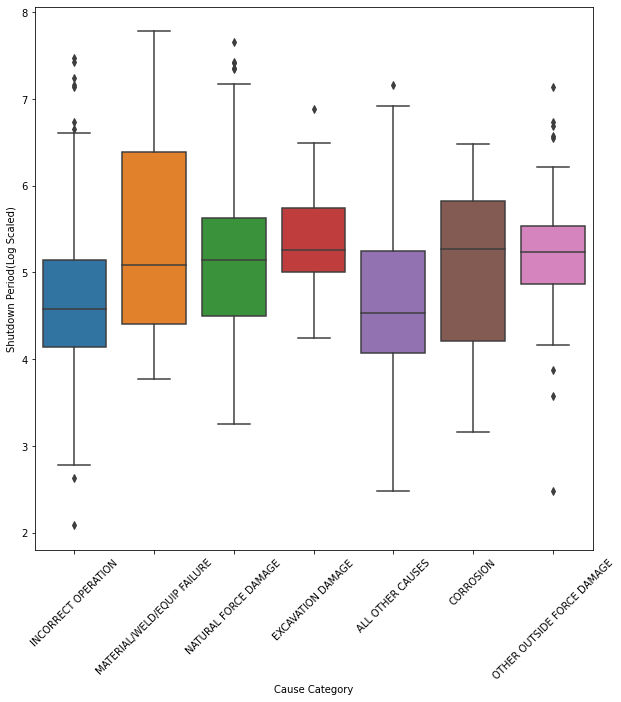

In [54]:
df_cause_category = df_raw.loc[(pd.notna(df_raw["Shutdown Period(Log Scaled)"])) & (df_raw["Shutdown Period(Log Scaled)"] != 0)]
fig,ax_cause_cat = plt.subplots(1,1,figsize = (10,10))
sns.boxplot(x = "Cause Category", y = "Shutdown Period(Log Scaled)", data = df_cause_category, ax = ax_cause_cat)
ax_cause_cat.set_xticklabels(df_raw["Cause Category"].unique().tolist(), rotation = 45)

As Observed above, there is a significant difference in the shutdown periods that are causes by different causes. Hence when filling in the empty values for cases with **Pipeline Shutdown** which are still NaN, we have to consider the cause of each incident. 

- Exacavation damage causes the largest shutdown period while Incorrect operatin causes the least. 

In [55]:
#values stored in log scale
average_shutdown_period = dict()

cause_cat_group = df_cause_category.groupby("Cause Category")

In [56]:
key_list = list()
for key,group in cause_cat_group:
    key_list.append(key)

In [57]:
for key in key_list:
    temp = cause_cat_group.get_group(key)
    average_shutdown_period[key] = temp["Shutdown Period(Log Scaled)"].mean()

average_shutdown_period

{'ALL OTHER CAUSES': 5.087770048286517,
 'CORROSION': 5.157792522499351,
 'EXCAVATION DAMAGE': 5.22070406531592,
 'INCORRECT OPERATION': 4.655045596965726,
 'MATERIAL/WELD/EQUIP FAILURE': 4.65616806994229,
 'NATURAL FORCE DAMAGE': 5.365724433730452,
 'OTHER OUTSIDE FORCE DAMAGE': 5.3204925658534235}

In [58]:
#fills the logscaled shutdown period
def fill_missing_shutdown_period(x,cause,shutdown_mean):
    if ((pd.isna(x["Shutdown Period(Log Scaled)"])) & (x["Cause Category"] == cause)):
        x["Shutdown Period(Log Scaled)"] = shutdown_mean
    return x

In [59]:
df_missing_values = count_missing_values(df_raw)
display(df_missing_values.style.background_gradient(cmap = 'Reds',axis = 0))

,Feature,Missing Value Count,Missing Value %
0,Accident Date/Time,0,0.000000
1,Operator Name,0,0.000000
2,Pipeline Location,0,0.000000
3,Pipeline Type,0,0.000000
4,Liquid Type,0,0.000000
5,Liquid Subtype,0,0.000000
6,Accident Latitude,0,0.000000
7,Accident Longitude,0,0.000000
8,Cause Category,0,0.000000
9,Cause Subcategory,0,0.000000


In [60]:
for cause in average_shutdown_period:
    mean = average_shutdown_period[cause]
    df_raw.loc[(pd.isna(df_raw["Shutdown Period(Log Scaled)"])) & (df_raw["Cause Category"] == cause),"Shutdown Period(Log Scaled)"] = mean

In [61]:
df_missing_values = count_missing_values(df_raw)
display(df_missing_values.style.background_gradient(cmap = 'Reds',axis = 0))

,Feature,Missing Value Count,Missing Value %
0,Accident Date/Time,0,0.000000
1,Operator Name,0,0.000000
2,Pipeline Location,0,0.000000
3,Pipeline Type,0,0.000000
4,Liquid Type,0,0.000000
5,Liquid Subtype,0,0.000000
6,Accident Latitude,0,0.000000
7,Accident Longitude,0,0.000000
8,Cause Category,0,0.000000
9,Cause Subcategory,0,0.000000


In [62]:
df_raw.to_csv(os.path.join(os.getcwd(),"df_raw.csv"))

In [63]:
#function to set back the shutdown period 
#10**(val) - 1
def convert_from_log_scale(x):
    if(pd.isna(x["Shutdown Period"])):
        shutdown_period = 10**x["Shutdown Period(Log Scaled)"] - 1
        x["Shutdown Period"] = shutdown_period
    return x

In [64]:
df_raw = df_raw.apply(lambda x: convert_from_log_scale(x), axis = 1)
df_missing_values = count_missing_values(df_raw)
display(df_missing_values.style.background_gradient(cmap = 'Reds',axis = 0))

,Feature,Missing Value Count,Missing Value %
0,Accident Date/Time,0,0.000000
1,Operator Name,0,0.000000
2,Pipeline Location,0,0.000000
3,Pipeline Type,0,0.000000
4,Liquid Type,0,0.000000
5,Liquid Subtype,0,0.000000
6,Accident Latitude,0,0.000000
7,Accident Longitude,0,0.000000
8,Cause Category,0,0.000000
9,Cause Subcategory,0,0.000000


In [65]:
df_raw.to_csv(os.path.join(os.getcwd(),"df_raw.csv"))

Since we have Shutdown Period, we can drop Shutdown Date/Time and Restart Date/Time

In [66]:
df_raw.drop(["Shutdown Date/Time","Restart Date/Time"],axis = 1, inplace = True)
df_missing_values = count_missing_values(df_raw)
display(df_missing_values.style.background_gradient(cmap = 'Reds',axis = 0))

,Feature,Missing Value Count,Missing Value %
0,Accident Date/Time,0,0.000000
1,Operator Name,0,0.000000
2,Pipeline Location,0,0.000000
3,Pipeline Type,0,0.000000
4,Liquid Type,0,0.000000
5,Liquid Subtype,0,0.000000
6,Accident Latitude,0,0.000000
7,Accident Longitude,0,0.000000
8,Cause Category,0,0.000000
9,Cause Subcategory,0,0.000000


In [67]:
df_raw.drop(["Public Evacuations"],axis = 1, inplace = True)

In [68]:
df_missing_values = count_missing_values(df_raw)
display(df_missing_values.style.background_gradient(cmap = 'Reds',axis = 0))

,Feature,Missing Value Count,Missing Value %
0,Accident Date/Time,0,0.000000
1,Operator Name,0,0.000000
2,Pipeline Location,0,0.000000
3,Pipeline Type,0,0.000000
4,Liquid Type,0,0.000000
5,Liquid Subtype,0,0.000000
6,Accident Latitude,0,0.000000
7,Accident Longitude,0,0.000000
8,Cause Category,0,0.000000
9,Cause Subcategory,0,0.000000


**All Costs** is the summation of all the other costs. Given that there are no missing values in **All Costs**, we can proceed to fill in the other missing costs.

In [69]:
cost_columns = [i for i in df_raw.columns.tolist() if re.match(r'.*Costs',i) != None]
cost_columns.remove('All Costs')
cost_columns

['Property Damage Costs',
 'Lost Commodity Costs',
 'Public/Private Property Damage Costs',
 'Emergency Response Costs',
 'Environmental Remediation Costs',
 'Other Costs']

In [70]:
def fill_in_costs(x):
    if sum(pd.isna(x[cost_columns]) > 0):
        #check if a feature is a NaN in the given row
        nan_column = [i for i in cost_columns if pd.isna(x[i])]
        non_nan_column = [i for i in cost_columns if pd.notna(x[i])]
        #checks if the sum of non NaN columns is equal to the total sum
        if (sum(x[non_nan_column]) == x["All Costs"]):
            x[nan_column] = 0.0
    return x


In [71]:
df_raw = df_raw.apply(lambda x: fill_in_costs(x), axis = 1)
df_missing_values = count_missing_values(df_raw)
display(df_missing_values.style.background_gradient(cmap = 'Reds',axis = 0))

,Feature,Missing Value Count,Missing Value %
0,Accident Date/Time,0,0.000000
1,Operator Name,0,0.000000
2,Pipeline Location,0,0.000000
3,Pipeline Type,0,0.000000
4,Liquid Type,0,0.000000
5,Liquid Subtype,0,0.000000
6,Accident Latitude,0,0.000000
7,Accident Longitude,0,0.000000
8,Cause Category,0,0.000000
9,Cause Subcategory,0,0.000000


In [72]:
idx_to_drop = df_raw.loc[df_raw["Time from Incident to Shutdown"].isna()].index.values.tolist()

In [73]:
df_raw.drop(idx_to_drop, inplace = True, axis = 0)

In [74]:
df_missing_values = count_missing_values(df_raw)
display(df_missing_values.style.background_gradient(cmap = 'Reds',axis = 0))

,Feature,Missing Value Count,Missing Value %
0,Accident Date/Time,0,0.000000
1,Operator Name,0,0.000000
2,Pipeline Location,0,0.000000
3,Pipeline Type,0,0.000000
4,Liquid Type,0,0.000000
5,Liquid Subtype,0,0.000000
6,Accident Latitude,0,0.000000
7,Accident Longitude,0,0.000000
8,Cause Category,0,0.000000
9,Cause Subcategory,0,0.000000


In [75]:
df_raw.to_csv(os.path.join(os.getcwd(),"df_raw.csv"))